# 第 6 节　正态分布及其应用

## 第 3 章　使用 Pyhton 进行数据分析｜用 Python 动手学统计学



### 1. 导入函数库

In [1]:
# 用于数值计算的库
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 用于绘图的库
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 设置浮点数打印精度
%precision 3
# 在 Jupyter Notebook 里显示图形
%matplotlib inline

### 2. 实现：概率密度

In [2]:
# 圆周率
sp.pi

3.142

In [3]:
# 指数函数
sp.exp(1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  


2.718281828459045

In [4]:
# 均值为 4 标准差为 0.8 的正态分布在随机变量为 3 时的概率密度
x = 3
mu = 4
sigma = 0.8

1 / (sp.sqrt(2 * sp.pi * sigma**2)) * \
    sp.exp(- ((x - mu)**2) / (2 * sigma**2))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  import sys


0.22831135673627742

In [5]:
stats.norm.pdf(loc = 4, scale = 0.8, x = 3)

0.2283113567362774

In [6]:
norm_dist = stats.norm(loc = 4, scale = 0.8)
norm_dist.pdf(x = 3)

0.2283113567362774

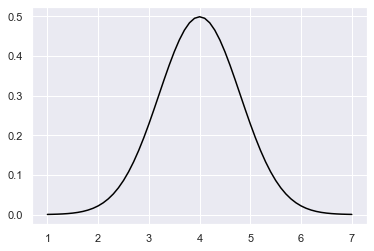

In [7]:
x_plot = np.arange(start = 1, stop = 7.1, step = 0.1)
plt.plot(
    x_plot, 
    stats.norm.pdf(x = x_plot, loc = 4, scale = 0.8),
    color = 'black'
)

### 3. 样本小于等于某值的比例

In [8]:
np.random.seed(1)
simulated_sample = stats.norm.rvs(
    loc = 4, scale = 0.8, size = 100000)
simulated_sample

array([5.299, 3.511, 3.577, ..., 4.065, 4.275, 3.402])

In [9]:
sp.sum(simulated_sample <= 3)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  """Entry point for launching an IPython kernel.


10371

In [10]:
sp.sum(simulated_sample <= 3) / len(simulated_sample)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  """Entry point for launching an IPython kernel.


0.10371

### 5. 实现：累积分布函数

In [11]:
stats.norm.cdf(loc = 4, scale = 0.8, x = 3)

0.10564977366685535

In [12]:
stats.norm.cdf(loc = 4, scale = 0.8, x = 4)

0.5

### 7. 实现：百分位数

In [13]:
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.025)

2.4320288123679563

In [14]:
left = stats.norm.cdf(loc = 4, scale = 0.8, x = 3)
stats.norm.ppf(loc = 4, scale = 0.8, q = left)

3.0000000000000004

In [15]:
stats.norm.ppf(loc = 4, scale = 0.8, q = 0.5)

4.0

### 10. t 值的样本分布

In [16]:
# 随机数种子
np.random.seed(1)
# 存放 t 值的空间
t_value_array = np.zeros(10000)
# 实例化一个正态分布
norm_dist = stats.norm(loc = 4, scale = 0.8)
# 开始实验
for i in range(0, 10000):
    sample = norm_dist.rvs(size = 10)
    sample_mean = sp.mean(sample)
    sample_std = sp.std(sample, ddof = 1)
    sample_se = sample_std / sp.sqrt(len(sample))
    t_value_array[i] = (sample_mean - 4) / sample_se

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  if sys.path[0] == '':


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


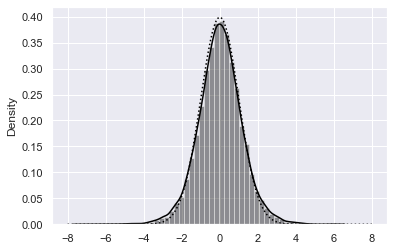

In [17]:
# t 值的直方图
sns.distplot(t_value_array, color = 'black')

# 标准正态分布的概率祺
x = np.arange(start = -8, stop = 8.1, step = 0.1)
plt.plot(x, stats.norm.pdf(x = x), 
         color = 'black', linestyle = 'dotted')

### 12. 实现：t 分布

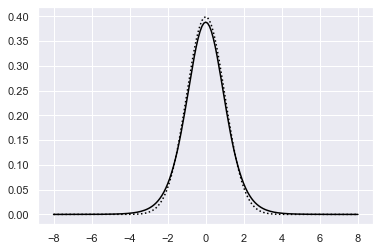

In [18]:
plt.plot(x, stats.norm.pdf(x = x), 
         color = 'black', linestyle = 'dotted')
plt.plot(x, stats.t.pdf(x = x, df = 9), 
         color = 'black')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


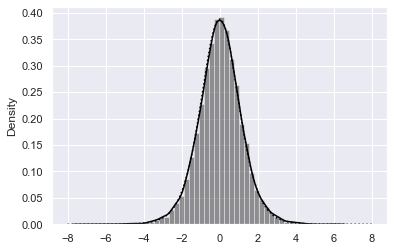

In [19]:
sns.distplot(t_value_array, 
             color = 'black', norm_hist = True)
plt.plot(x, stats.t.pdf(x = x, df = 9), 
         color = 'black', linestyle = 'dotted')